In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [2]:
X = fetch_california_housing().data
y = fetch_california_housing().target

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

In [3]:
scaler = StandardScaler().fit(X_train)

In [4]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [5]:
X_valid.shape

(2890, 8)

In [6]:
scaler.transform(X_train).shape

(11558, 8)

In [7]:
model.compile(loss='mean_squared_error',
              optimizer='sgd')

history = model.fit(scaler.transform(X_train), y_train, epochs=20,
                    validation_data=(scaler.transform(X_valid), y_valid))

Epoch 1/20
362/362 [==============================] - 2s 3ms/step - loss: 1.9486 - val_loss: 0.5014
Epoch 2/20
362/362 [==============================] - 1s 3ms/step - loss: 0.5445 - val_loss: 0.4019
Epoch 3/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4013 - val_loss: 0.3653
Epoch 4/20
362/362 [==============================] - 1s 2ms/step - loss: 0.3755 - val_loss: 0.3595
Epoch 5/20
362/362 [==============================] - 1s 3ms/step - loss: 0.3792 - val_loss: 0.3497
Epoch 6/20
362/362 [==============================] - 1s 3ms/step - loss: 0.3816 - val_loss: 0.3410
Epoch 7/20
362/362 [==============================] - 1s 3ms/step - loss: 0.3608 - val_loss: 0.3429
Epoch 8/20
362/362 [==============================] - 1s 3ms/step - loss: 0.3541 - val_loss: 0.3338
Epoch 9/20
362/362 [==============================] - 1s 3ms/step - loss: 0.3705 - val_loss: 0.3376
Epoch 10/20
362/362 [==============================] - 1s 2ms/step - loss: 0.3823 - val_loss: 0.3467

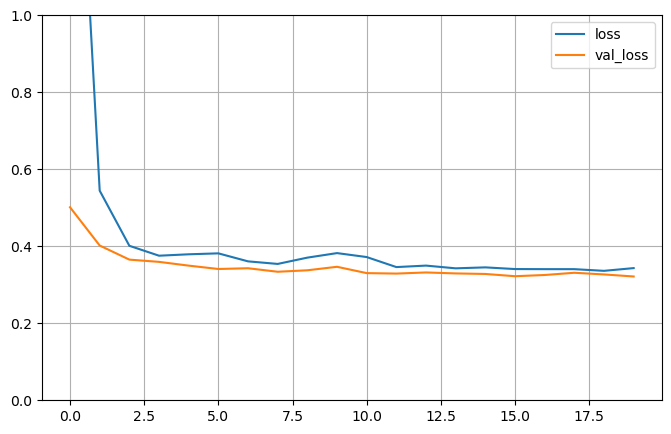

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [9]:
model.evaluate(scaler.transform(X_test), y_test)

194/194 [==============================] - 0s 1ms/step - loss: 0.3439


0.3439292907714844